# regressione lineare in pytorch

In [36]:
### librerie utilizzate
import numpy as np
import torch
### dataset
from sklearn.datasets import load_boston
from matplotlib import pyplot as plt
from torch import nn

boston = load_boston()
###print(boston.DESCR)

Il dataset è composto da osservazioni. Ogni osservazione consiste in 13 valori che costituiscono una serie di rilevamenti di caratteristiche di vicinati della città di Boston. I "target" sono i valori medianti delle case espressi in multipli di 1000 dollari. Estraiamo le osservazioni e i valori target X e Y :

In [47]:
X = boston.data
Y = boston.target
### calcolo permutazione casuale degli indici
np.random.seed(123) ## per ottenere risultati ripetibili
torch.random.manual_seed(123)
idx = np.random.permutation(len(X)) ## permutazione casuale degli indici.
### print("permutazione:", idx)
### stessa permutazione sia a X che a Y
X = X[idx]
Y = Y[idx]
print(X.shape, X)   # comb
print(Y.shape, Y)   # valori

(506, 13) [[5.11358e+01 0.00000e+00 1.81000e+01 ... 2.02000e+01 2.60000e+00
  1.01100e+01]
 [5.73500e-02 0.00000e+00 4.49000e+00 ... 1.85000e+01 3.92300e+02
  6.53000e+00]
 [3.57800e-02 2.00000e+01 3.33000e+00 ... 1.49000e+01 3.87310e+02
  3.76000e+00]
 ...
 [3.51140e-01 0.00000e+00 7.38000e+00 ... 1.96000e+01 3.96900e+02
  7.70000e+00]
 [9.18702e+00 0.00000e+00 1.81000e+01 ... 2.02000e+01 3.96900e+02
  2.36000e+01]
 [4.55587e+00 0.00000e+00 1.81000e+01 ... 2.02000e+01 3.54700e+02
  7.12000e+00]]
(506,) [15.  26.6 45.4 20.8 34.9 21.9 28.7  7.2 20.  32.2 24.1 18.5 13.5 27.
 23.1 18.9 24.5 43.1 19.8 13.8 15.6 50.  37.2 46.  50.  21.2 14.9 19.6
 19.4 18.6 26.5 32.  10.9 20.  21.4 31.  25.  15.4 13.1 37.6 37.  18.9
 27.9 50.  14.4 22.  19.9 21.6 15.6 15.  32.4 29.6 20.4 12.3 19.1 14.9
 17.8  8.8 35.4 11.5 19.6 20.6 15.6 19.9 23.3 22.3 24.8 16.1 22.8 30.5
 20.4 24.4 16.6 26.2 16.4 20.1 13.9 19.4 22.8 13.8 31.6 10.5 23.8 22.4
 19.3 22.2 12.6 19.4 22.2 29.8  9.6 34.9 21.4 25.3 32.9 26.6 14.6 

suddivido il dataset in training e testing set indipendenti selezionando i primi 50 valori per formare il testing set. <br>trasformiamo gli array in tensori e inseriamo dentro delle variabili.
**Non impostiamo require_grads_(True) perché non sono necessari per il calcolo dei gradienti**
<br>**Perché la permutazione casuale???** per evitare di dare una direzione?



In [49]:
X_training = torch.Tensor(X[50:])
Y_training = torch.Tensor(Y[50:])
X_testing = torch.Tensor(X[:50])
Y_testing = torch.Tensor(Y[:50])

il modello dipende da 14 parametri.
- 13 feature in ingresso
- 14° l'intercetta della retta

Definiamo un array di parametri theta (pesi) e lo inizializziamo in maniera casuale, seguendo una distribuzione normale centrata sullo 0 e varianza 0.1 (theta assume valori iniziali sia positivi che negativi)
Definiamo una variabile per l'intercetta (bias)

In [50]:
theta = torch.Tensor(13) #creiamo un tensore di 13 unità
theta_0 = torch.Tensor(1) #tensore di una unità (bias)

theta.requires_grad_(True)      ## true perché da questi devo calcolare i gradienti
theta_0.requires_grad_(True)

## per considerare farli diventare molto piccoli e per evitare di inizializzarli a 0 si cerca di non dare una direzione x evitare di fare poche assunzioni. se le impostiamo a 0 non sarà del tutto randomica e una deviazione standard poiché siano sullo stesso spazio

theta.data.normal_(0,0.1) #inizializziamo il tensore con numeri casuali tratti da una #distribuzione normale di media 0 e varianza 0.1
theta_0.data.normal_(0,0.1)

print(theta)
print(theta_0)

tensor([-0.0111,  0.0120, -0.0370, -0.0240, -0.1197,  0.0209, -0.0972, -0.0755,
         0.0324, -0.0109,  0.0210, -0.0391,  0.0235], requires_grad=True)
tensor([0.0665], requires_grad=True)


Definiamo il modello di regressione lineare dipendente dai parametri theta e dai valori input x.
input: matrice di dimensione [N x D] con N numero di campioni in ingresso e D dimensione dei dati (13)

In [52]:
def linear_regression(input, theta, theta_0):
  """con input.mul(theta) moltiplica ogni riga di INPUT per vettore theta. Calcola i termini thetaixi.
      con sum otteniamo la sommatoria"""
  return input.mul(theta).sum(1)+theta_0


### y = preditect value
y = linear_regression(X_training, theta, theta_0)
print("valori predetti", y[:10], "\nvalori di grond thruth" , Y_training[:10])


valori predetti tensor([-20.8190, -23.3360, -24.6247, -31.4600, -27.4998, -28.1950, -27.1047,
        -26.2724, -18.8539, -31.4594], grad_fn=<SliceBackward>) 
valori di grond thruth tensor([32.4000, 29.6000, 20.4000, 12.3000, 19.1000, 14.9000, 17.8000,  8.8000,
        35.4000, 11.5000])


Il modello usa ancora pesi inizializzati casualmente, di conseguenza i valori sono molti diversi. Definiamo una funzione di loss per poi procedere con l'algoritmo della discesa del gradiente per ottimizzare quei pesi 
![](img/01.png)
con y segnato vettore delle etichette stimate e y quelle delle etichette reali (ground truth) ed N numero di campioni

In [53]:
def loss(input, target):
  return ((input-target)**2).mean()


print(loss(y,Y_training)) 

tensor(2274.0801, grad_fn=<MeanBackward0>)


Il valore è molto grande perché le predizioni sono molto distanti dei valori reali.

#### Applichiamo il metodo della discesa del gradiente

![](img/02.png)

dove:
y segnato i stima i valori delle etichette utilizzando un modello distanti dai valori reali
x è il vettore dei campioni
e Ltheta è differenziabile rispetto a theta

appplico tecnica di discesa del gradiente per ottimizzare il modello di regressione leinare. (formula)
<br>
tecnica iterativa che:<br>
1. normalizza dati in ingresso
2. inizializza sigma in maniera opportuna
3. calcola le predizioni
4. calcola valore di loss
5. calcola il gradiente rispetto a sigma della funzione di losso
6. aggiorna i pesi sigma secondo la regola (formula) dove n è learning rate
7. ripeto 3-6 fino a convergenza
<br>

invece di ripetere fino a convergenza si sceglie un numero di iterazioni per il quale ripetere la procedura. ogni iterazione è detta *epoca* e si implementa l'algoritmo di discesa del gradiente usando autograd. ognuna delle 13 osservazioni in input ha unità di misure diverse (potenzialmente) quindi si normalizzano i dati con media e deviazione standard per evitare che una variabile sia più influtente rispetto ad altre.
<br>

In [57]:
means = X_training.mean(0)  ## calcolo media
stds = X_training.std(0)    ## calcolo dev std
print(means, stds)

## le 13 variabili hanno medie e dv std diverse. uniformiamo sottraendo le medie e dividiamo tutti i dati, colonna per colonna, per le deviazioni standard
X_training_norm = (X_training-means)/stds
## adesso le 13 variabili hannp medie prossime allo 0 e dv standard pari a 1
print("X_TRAINING NORM", X_training_norm.mean(0), "\nX_TRAINIG DV STD", X_training_norm.std(0))

## applico la stessa normalizzazione al test set
## nb: il test set non è noto in fase di training e dunque non è stato utilizzato per calcolare le medie e deviazioni standard usate per la normalizzazione:
X_testing_norm = (X_testing-means)/stds
print("TESTING. NORM", X_testing_norm)

tensor([3.5481e+00, 1.1293e+01, 1.1224e+01, 6.1404e-02, 5.5591e-01, 6.2701e+00,
        6.8338e+01, 3.7963e+00, 9.5658e+00, 4.0893e+02, 1.8468e+01, 3.5775e+02,
        1.2820e+01]) tensor([8.4949e+00, 2.3287e+01, 6.9195e+00, 2.4033e-01, 1.1805e-01, 6.9616e-01,
        2.8338e+01, 2.1295e+00, 8.7019e+00, 1.6880e+02, 2.1430e+00, 9.0201e+01,
        7.1928e+00])
X_TRAINING NORM tensor([ 0.0000e+00,  7.3199e-09,  1.2914e-07,  2.0914e-09,  3.1685e-07,
        -4.2664e-07,  9.5158e-08,  1.2444e-07,  1.7777e-08,  2.1437e-08,
        -2.1332e-07, -1.1503e-07,  1.6731e-07]) 
X_TRAINIG DV STD tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000])
TESTING. NORM tensor([[ 5.6019e+00, -4.8493e-01,  9.9374e-01, -2.5549e-01,  3.4808e-01,
         -7.3711e-01,  1.1173e+00, -1.1192e+00,  1.6587e+00,  1.5229e+00,
          8.0844e-01, -3.9373e+00, -3.7682e-01],
        [-4.1092e-01, -4.8493e-01, -9.7316e-01, -2.5549e-01, -9.0565e-01,
    

implemento la procedura di training impostando il learning rate a 0.1 e ottimizzando il modello per 10 epoche:

In [63]:
lr = 0.1
epochs = 50

## PASSO 1: normalizzazione dei dati
means = X_training.mean(0)
stds = X_training.std(0)

X_training_norm = (X_training-means)/stds
X_testing_norm = (X_testing-means)/stds

## passo 2: inizializziamo i pesi
theta = torch.Tensor(13);
theta_0 = torch.Tensor(1);

theta.normal_(0,0.01)
theta_0.normal_(0,0.01)

theta.requires_grad_(True)
theta_0.requires_grad_(True)

losses = []

for e in range(epochs):
    # passo 3: calcoliamo le predizioni
    y = linear_regression(X_training_norm, theta, theta_0)
    # passo 4: calcolo valore della loss
    l = loss(y, Y_training)
    # passo 5: calcoliamo il gradiente della loss rispetto a tutti i parametri
    l.backward()

    #conserviamo il valore della loss
    losses.append(l.item())

    #Passo 6: Aggiorniamo i pesi
    theta.data.sub_(lr*theta.grad.data)
    theta_0.data.sub_(lr*theta_0.grad.data)

    #azzeriamo i gradienti per evitare di accumularli
    theta.grad.data.zero_()
    theta_0.grad.data.zero_()

plotto evoluzione dei valori di loss per visualizzarne l'evoluzione

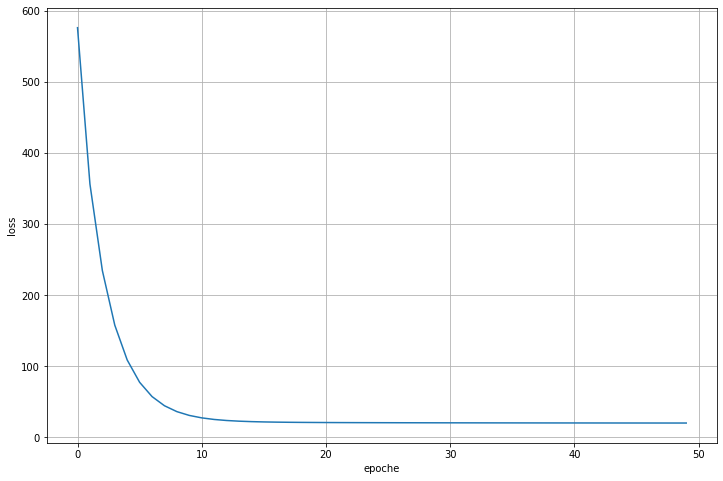

In [66]:
plt.figure(figsize=(12,8))
plt.plot(losses)
plt.xlabel('epoche')
plt.ylabel('loss')
plt.grid()
plt.show()

converge dopo 15 epoche, portando a un valore stabile intorno alle 20 unità. (non sappiamo se il modello generalizza perché stiamo ragionando solo sulla los di training). Calcoliamo valore della loss sul test set.

In [72]:
## calcolo predizione del modello dati i pesi allenati

## yt = predicted test
yt = linear_regression(X_testing_norm, theta, theta_0)
## calcolo valore della loss
print("valore della loss su training    ", loss(y, Y_training))
print("valore della loss su             ", loss(yt, Y_testing))

valore della loss su training     tensor(20.1947, grad_fn=<MeanBackward0>)
valore della loss su              tensor(42.8908, grad_fn=<MeanBackward0>)


è circa il doppio rispetto a quella di training, indica un livello di overfitting. Per capire se anche la loss di test converge, seguiamo l'evolzione durante il training. Modifichiamo il codice di training per includere il **calcolo e salvataggio della loss di test**

In [78]:
lr = 0.1
epochs = 50

## PASSO 1: normalizzazione dei dati
means = X_training.mean(0)
stds = X_training.std(0)

X_training_norm = (X_training-means)/stds
X_testing_norm = (X_testing-means)/stds

## passo 2: inizializziamo i pesi
theta = torch.Tensor(13);
theta_0 = torch.Tensor(1);

theta.normal_(0,0.01)
theta_0.normal_(0,0.01)

theta.requires_grad_(True)
theta_0.requires_grad_(True)

losses_train = []
losses_test = []

for e in range(epochs):
    # passo 3: calcoliamo le predizioni
    y = linear_regression(X_training_norm, theta, theta_0)
    # passo 4: calcolo valore della loss
    l = loss(y, Y_training)

    # conservo il valore della loss di training
    losses_train.append(l.item())

    # passo 5: calcoliamo il gradiente della loss rispetto a tutti i parametri
    l.backward()

    #Passo 6: Aggiorniamo i pesi
    theta.data.sub_(lr*theta.grad.data)
    theta_0.data.sub_(lr*theta_0.grad.data)

    #azzeriamo i gradienti per evitare di accumularli
    theta.grad.data.zero_()
    theta_0.grad.data.zero_()

    #calcoliamo la loss sul test set
    #dato che non dobbiamo calcolare i gradienti
    #li disabilitiamo per risparmiare memoria 
    with torch.set_grad_enabled(False):
        y_test = linear_regression(X_testing_norm, theta, theta_0)
        loss_test = loss(y_test, Y_testing)
        losses_test.append(loss_test.item())

stampo i valori della loss

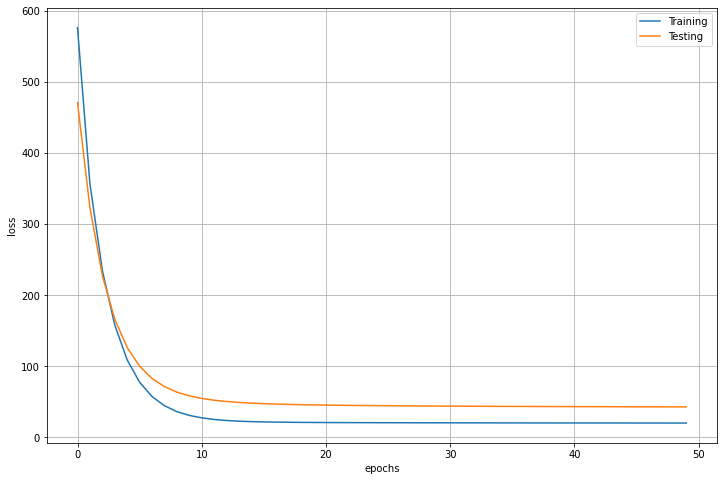

In [79]:
plt.figure(figsize=(12,8))
plt.plot(losses_train)
plt.plot(losses_test)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.legend(['Training','Testing'])
plt.show()

osserviamo che anche la loss di test converge sebbene ad un valore più alto di quella di training